<a href="https://colab.research.google.com/github/tapickell/ml_python/blob/main/Karpathy_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2 --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118


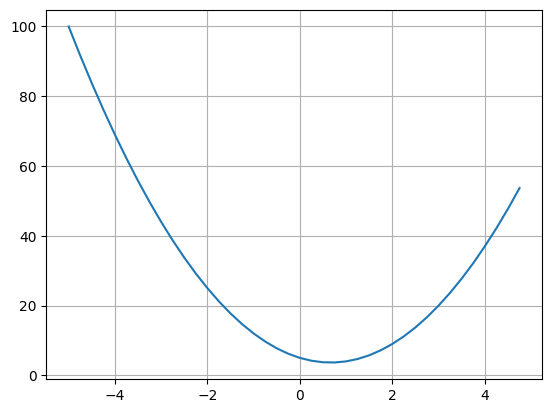

In [34]:
import math
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
def f(x):
    return 3*x**2 -  4*x + 5

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x - np.max(x)) # For numerical stability
    return exp_x / np.sum(exp_x, axis=0)

xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)
plt.grid()


In [35]:
h = 0.000000001
x = 3.0
# at 3.0 the slope is 14.00...
(f(x + h) - f(x)) / h

14.000001158365194

In [36]:
h = 0.000000001
x = 2/3
# at 3.0 the slope is 14.00...
(f(x + h) - f(x)) / h


0.0

In [37]:
h = 0.001

a = 2.0
b = -3.0
c = 10.0
d1 = a*b + c
d2 = (a+h)*b + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)

d1 4.0
d2 3.997
slope -3.0000000000001137


In [38]:
h = 0.001

a = 2.0
b = -3.0
c = 10.0
d1 = a*b + c
d2 = a*(b+h) + c

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)


d1 4.0
d2 4.002
slope 1.9999999999997797


In [39]:
h = 0.001

a = 2.0
b = -3.0
c = 10.0
d1 = a*b + c
d2 = a*b + (c + h)

print('d1', d1)
print('d2', d2)
print('slope', (d2 - d1)/h)


d1 4.0
d2 4.0009999999999994
slope 0.9999999999994458


In [40]:
ids = iter(range(99999999))

class Value:
  def __init__(self, data, _children=(), _op='', label=''):
    self.id = next(ids)
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    #if self._op:
    if False:
      return f"Value(data={self.data}, grad={self.grad}; (:{self._op} {tuple(self._prev)}))"
    else:
      return f"Value(id={self.id} data={self.data})"

  def propogate(self):
    self._backward()
    for child in self._prev:
      child.propogate()

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    def _backward():
      self.grad = 1.0 * out.grad
      other.grad = 1.0 * out.grad
    out._backward = _backward
    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')
    def _backward():
      self.grad = other.data * out.grad
      other.grad = self.data * out.grad
    out._backward = _backward
    return out

  def tanh(self):
    n = self.data
    t = (math.exp(2*n) -1)/(math.exp(2*n) +1)
    out = Value(t, (self, ), 'tanh')
    def _backward():
      self.grad = (1 - t**2) * out.grad
    out._backward = _backward
    return out

In [41]:
from graphviz import Digraph

def trace(root):
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    dot.node(name = uid, label = "{ %d | %s | data %.4f | grad %.4f }" % (n.id, n.label, n.data, n.grad), shape='record')
    if n._op:
      dot.node(name=uid + n._op, label=n._op)
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

In [42]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
loss = d * f; loss.label = 'loss'
loss

Value(id=6 data=-8.0)

In [43]:
d

Value(id=4 data=4.0)

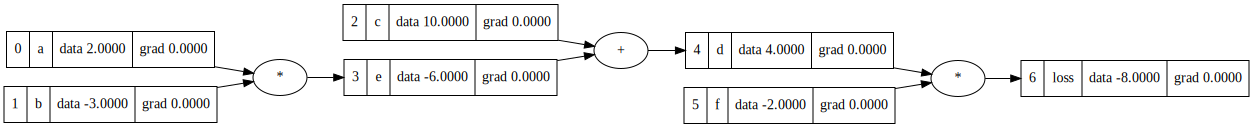

In [44]:
draw_dot(loss)

Manual BackPropogation

local dirivative
- of identity (self) is `1.0`
- of a sum `+` `(1.0, 1.0)`; routes the dirivative through
- of a product `*` `(y, x)` from `(x, y)`; transposes values
- of a difference `-` ??
- of a quotient `/` ??

Chain Rule in Calculus
\begin{align}
\frac{dz}{dx} = \frac{dz}{dy} * \frac{dy}{dx}
\end{align}


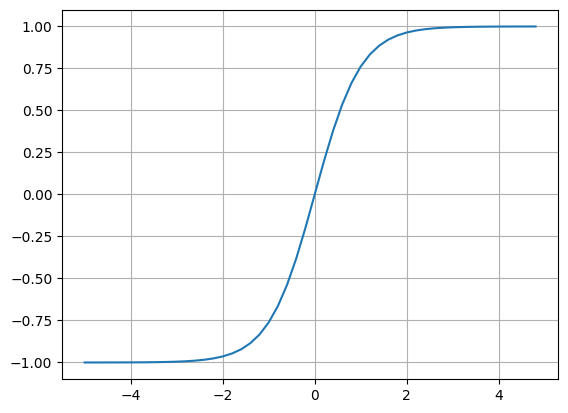

In [45]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

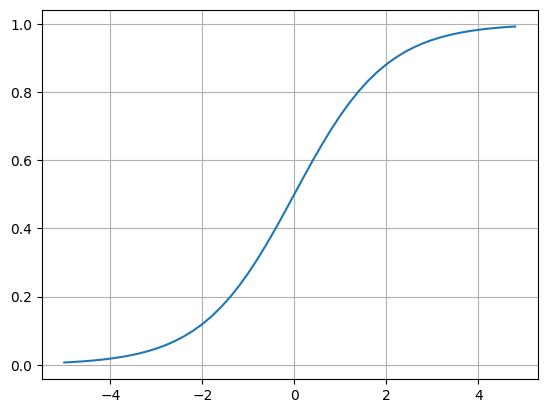

In [46]:
plt.plot(np.arange(-5,5,0.2), sigmoid(np.arange(-5,5,0.2))); plt.grid();

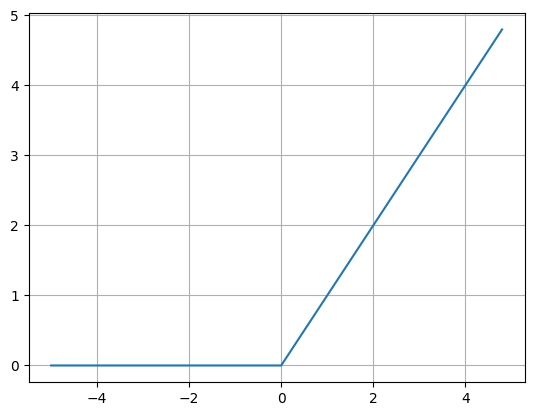

In [47]:
plt.plot(np.arange(-5,5,0.2), relu(np.arange(-5,5,0.2))); plt.grid();

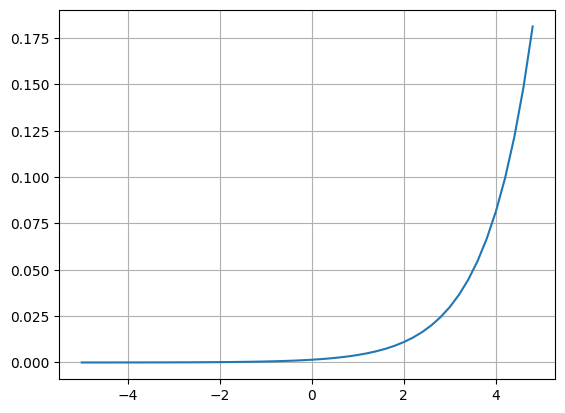

In [48]:
plt.plot(np.arange(-5,5,0.2), softmax(np.arange(-5,5,0.2))); plt.grid();

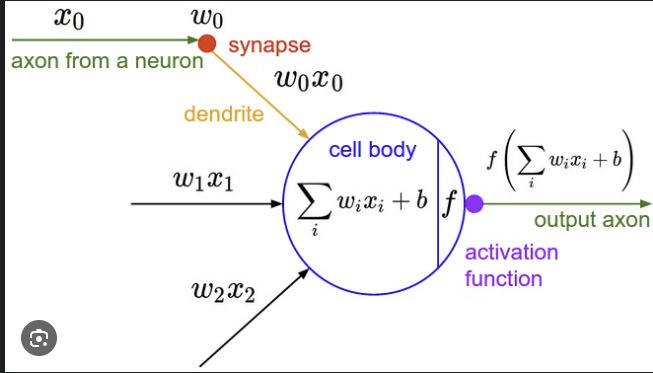

In [49]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# neuron bias
b = Value(6.8813735870195432, label='b')

# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

Dirivative for BackPropogation
\begin{align}
o = tanh(n)
\end{align}

\begin{align}
\frac{do}{dn} = 1 - o^2
\end{align}

In [50]:
# o.grad = 1.0
# dodn = 1 - o.data**2
# n.grad = dodn
# x1w1x2w2.grad = 0.5
# b.grad = 0.5
# x2w2.grad = 0.5
# x1w1.grad = 0.5
# x1.grad = w1.data * x1w1.grad
# w1.grad = x1.data * x1w1.grad
# x2.grad = w2.data * x2w2.grad
# w2.grad = x2.data * x2w2.grad

In [51]:
# o.grad = 1.0
# print(o._backward())
# n._backward()
# b._backward()
# x1w1x2w2._backward()
# x1w1._backward()
# x2w2._backward()

In [52]:
# topo = []
# visited = set()
# def build_topo(v):
#   if v not in visited:
#     visited.add(v)
#     for child in v._prev:
#       build_topo(child)
#     topo.append(v)

# build_topo(o)
# print(topo)

# for node in reversed(topo):
#   print(node)

In [53]:
o.grad = 1.0
o.propogate()

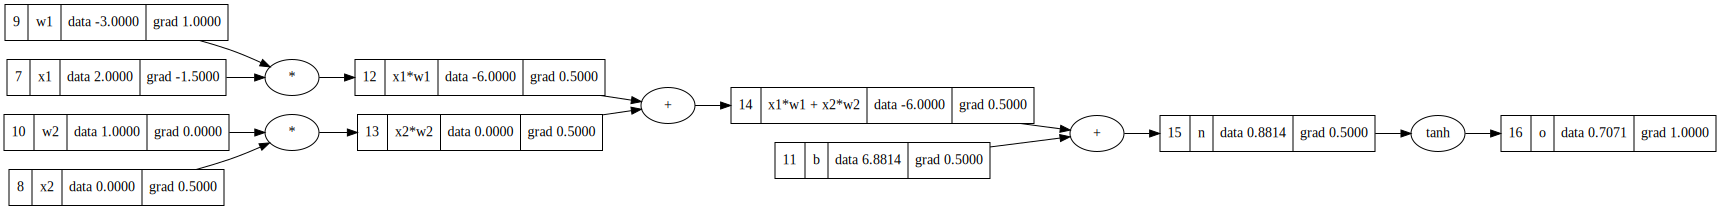

In [54]:
draw_dot(o)

In [55]:
import torch
x1 = torch.Tensor([2.0]).double(); x1.requires_grad = True
x2 = torch.Tensor([0.0]).double(); x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad = True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)
o.backward()
print(o.data.item())


0.7071066904050358


In [58]:
import random

class Neuron:
  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi,xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out

class Layer:
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs

class MLP:
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

In [57]:
x = [2.0, 3.0]
n = Neuron(2)
n(x)

AttributeError: 'float' object has no attribute 'data'

In [ ]:
# Mean Squared Error Loss squaring always gives positive number (could do abs value as well)
[(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]